In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os


# Replace with the actual paths to your JSON files
# json_paths = [os.path.join(os.path.dirname(os.getcwd()), 'log_dir/scaling_factor_0.1_v3_modelscale3_attempt2_bs256_acc1_clipv5.0_configv2_scratch_e10/eval_student_model_urma.json'),
#               os.path.join(os.path.dirname(os.getcwd()), 'log_dir/scaling_factor_0.3_v3_modelscale3_attempt2_bs256_acc1_clipv5.0_configv2_scratch_e10_liu/eval_student_model_urma.json'),
#               os.path.join(os.path.dirname(os.getcwd()), 'log_dir/scaling_factor_0.5_v3_modelscale3_attempt2_bs256_acc1_clipv5.0_configv2_scratch_e10/eval_student_model_urma.json'),
#                 os.path.join(os.path.dirname(os.getcwd()), 'log_dir/scaling_factor_1.0_v3_modelscale3_attempt2_bs256_acc1_clipv5.0_configv2_scratch_resumee3_3_liu/eval_student_model_urma.json'),
#               ]

# json_paths = [
#     "/mnt/hdd_0/distillation_results/liudai_hexapod_exp/scaling_factor_0.1_v3/eval_student_model_urma.json", 
#     "/mnt/hdd_0/distillation_results/liudai_hexapod_exp/scaling_factor_0.2_v3/eval_student_model_urma.json", 
#     "/mnt/hdd_0/distillation_results/liudai_hexapod_exp/scaling_factor_0.6_v3/eval_student_model_urma.json", 
# ]

json_paths = [
    "/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_0.2_v3/eval_student_model_urma_detailed.json", 
    "/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_0.4_v3/eval_student_model_urma_detailed.json", 
    "/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_0.6_v3/eval_student_model_urma_detailed.json", 
    "/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_0.8_v3/eval_student_model_urma_detailed.json",
    "/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_1.0_v3_worker0_maxfile5_no12/eval_student_model_urma_detailed.json",
]

# Function to read JSON files and load dictionaries
def load_dicts_from_json(paths):
    data_dicts = []
    for path in paths:
        print(path)
        with open(path, "r") as f:
            data_dicts.append(json.load(f))
    return data_dicts

# Function to calculate means and standard deviations
def calculate_stats(data_dicts):
    means = []
    stds = []
    for data in data_dicts:
        values = [v["average_return"] for v in data.values()]
        means.append(np.mean(values))
        stds.append(np.std(values))
    return means, stds

# Load data from JSON files
data_dicts = load_dicts_from_json(json_paths)

/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_0.2_v3/eval_student_model_urma_detailed.json
/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_0.4_v3/eval_student_model_urma_detailed.json
/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_0.6_v3/eval_student_model_urma_detailed.json
/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_0.8_v3/eval_student_model_urma_detailed.json
/mnt/hdd_0/distillation_results/bai_quadruped_exp/scaling_factor_1.0_v3_worker0_maxfile5_no12/eval_student_model_urma_detailed.json


In [2]:
import math

# Function to check if a value is NaN
def is_nan(value):
    return isinstance(value, float) and math.isnan(value)

def remove_nans(data_dict):
    # Iterate through the list of dictionaries
    for dict_index, data in enumerate(data_dict):
        keys_to_remove = []  # Collect keys to remove in this dict
        for key, sub_dict in data.items():
            if 'average_return' in sub_dict and is_nan(sub_dict['average_return']):
                # Log info message
                print(f"[INFO] NaN value found in entry '{key}' at index {dict_index}")
                # Add the key to the removal list
                keys_to_remove.append(key)
        # Remove the keys with NaN values
        for key in keys_to_remove:
            del data[key]
    return data_dict

data_dicts = remove_nans(data_dicts)

[INFO] NaN value found in entry 'Gendog260' at index 1
[INFO] NaN value found in entry 'Gendog258' at index 4


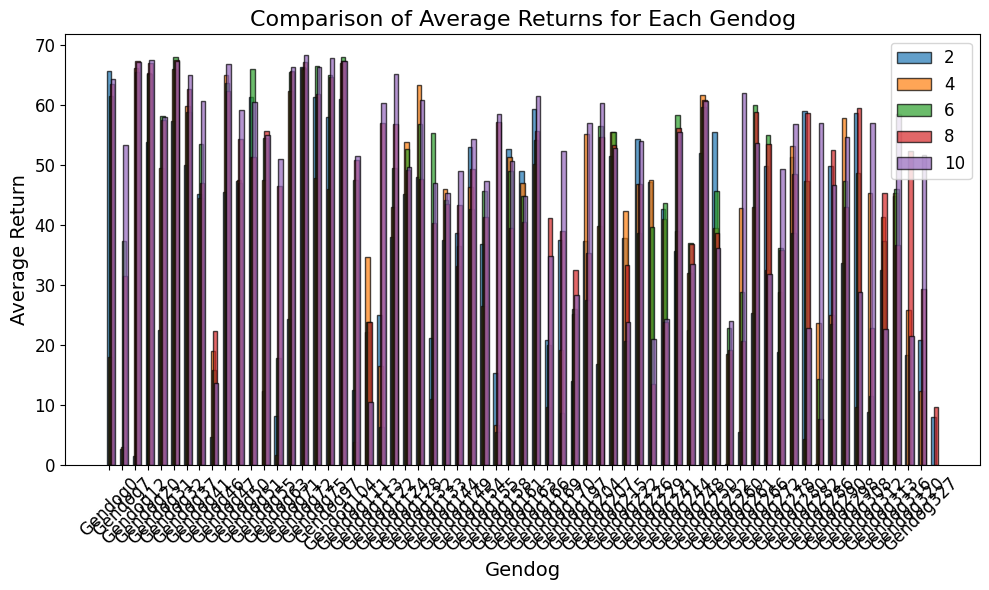

In [3]:
""# Create the plot
plt.figure(figsize=(10, 6))

labels = [2, 4, 6, 8, 10]

for i, data_dict in enumerate(data_dicts):
    # Extract Gendogs and their average returns
    gendogs = list(data_dict.keys())
    rewards = [data_dict[gendog]['average_return'] for gendog in gendogs]

    # X positions for the bars
    x = np.arange(len(gendogs))  # The label locations
    width = 0.35  # Width of the bars

    plt.bar(x + i*width/len(data_dicts), rewards, width, label=labels[i], alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title("Comparison of Average Returns for Each Gendog", fontsize=16)
plt.xlabel("Gendog", fontsize=14)
plt.ylabel("Average Return", fontsize=14)
plt.xticks(x, gendogs, fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

In [4]:
!pip install seaborn

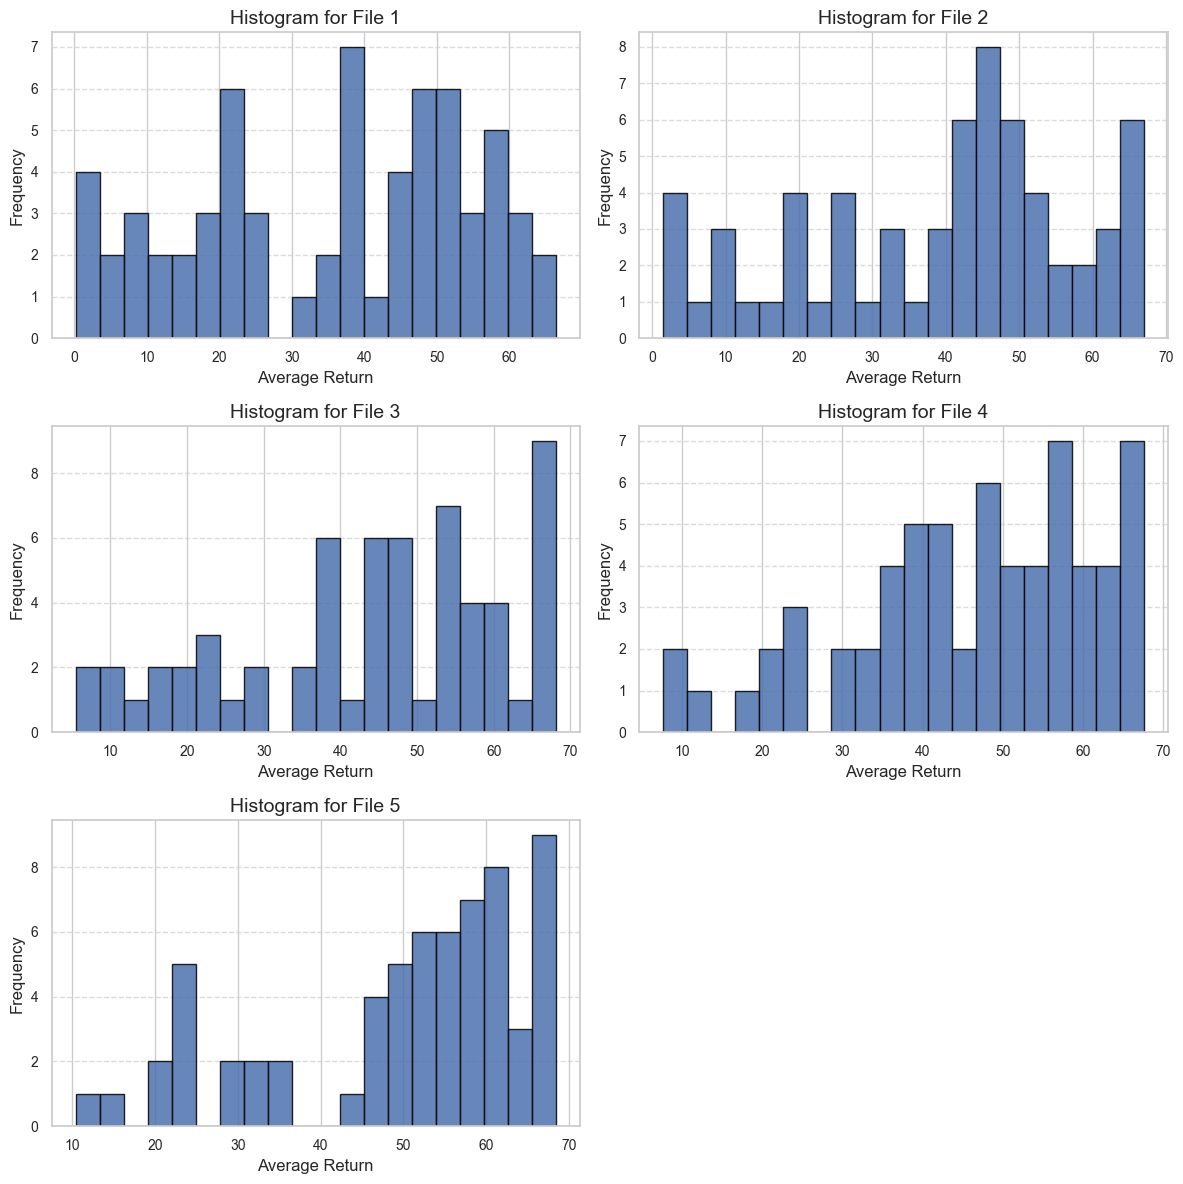

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improved plot_histograms_separately function
def plot_histograms_separately(data_dicts):
    num_dicts = len(data_dicts)
    cols = 2  # Number of columns for subplots
    rows = (num_dicts + 1) // cols  # Calculate the number of rows needed

    # Set a consistent style
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(12, rows * 4))

    for i, data_dict in enumerate(data_dicts):
        values = [v["average_return"] for v in data_dict.values()]
        plt.subplot(rows, cols, i + 1)
        plt.hist(values, bins=20, color='#4c72b0', alpha=0.85, edgecolor='black')
        plt.xlabel("Average Return", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.title(f"Histogram for File {i+1}", fontsize=14)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# Example usage
if data_dicts:
    plot_histograms_separately(data_dicts)


In [6]:
# # Scaling curve without expert
# # Calculate statistics for bar chart
# means = [np.mean([v["average_return"] for v in d.values()]) for d in data_dicts]
# stds = [np.std([v["average_return"] for v in d.values()]) for d in data_dicts]

# # Add expert values to bar chart
# x_labels = [f"File {i+1}" for i in range(len(data_dicts))] 

# # Plot bar chart with error bars
# plt.figure(figsize=(10, 6))
# plt.bar(x_labels, means, yerr=stds, capsize=5, alpha=0.7)
# plt.ylabel("Mean Average Return")
# plt.title("Bar Chart with Error Bars (Excluding Expert)")
# plt.tight_layout()
# plt.show()

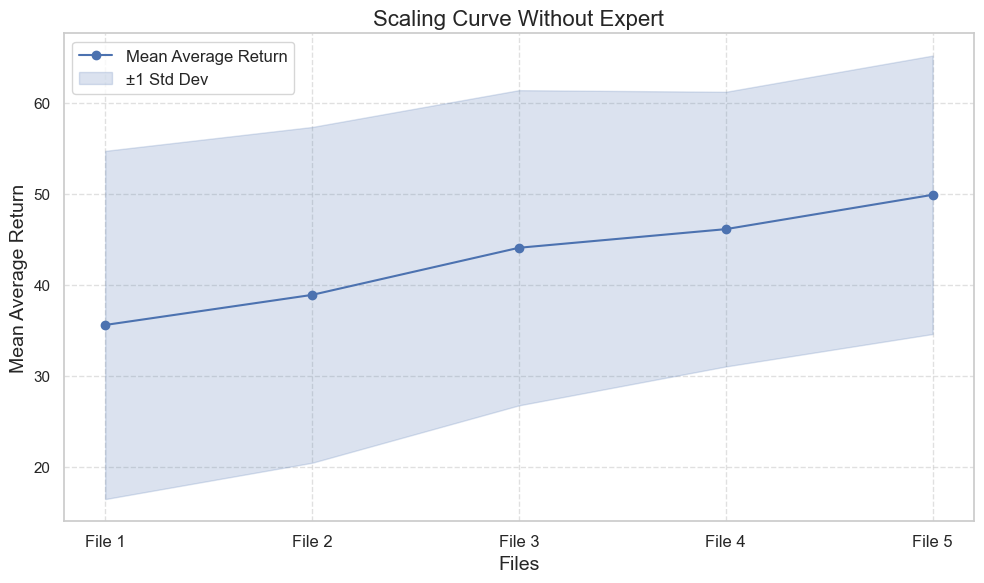

In [7]:
# Calculate statistics for the line plot
means = [np.mean([v["average_return"] for v in d.values()]) for d in data_dicts]
stds = [np.std([v["average_return"] for v in d.values()]) for d in data_dicts]

# Define x-axis labels and positions
x_labels = [f"File {i+1}" for i in range(len(data_dicts))]
x_positions = np.arange(len(data_dicts))

# Plot line plot with error bars
plt.figure(figsize=(10, 6))
plt.plot(x_positions, means, marker='o', label="Mean Average Return", linestyle='-', color='b')
plt.fill_between(x_positions, np.array(means) - np.array(stds), np.array(means) + np.array(stds), 
                 color='b', alpha=0.2, label="±1 Std Dev")

# Add labels, legend, and style
plt.xticks(x_positions, x_labels, fontsize=12)
plt.xlabel("Files", fontsize=14)
plt.ylabel("Mean Average Return", fontsize=14)
plt.title("Scaling Curve Without Expert", fontsize=16)
plt.legend(fontsize=12, loc="best")
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()

In [8]:
# Calculate means and 95% confidence intervals.
# first, compute the performance means on all robots, for every policy
reward_means_list = []
length_means_list = []
for d in data_dicts:
    rewards = np.array([v["returns"] for v in d.values()])  # shape (N, 4096)
    episode_lengths = np.array([v["steps"] for v in d.values()])
    print(rewards.shape, episode_lengths.shape)
    assert rewards.shape[1] == 4096 and episode_lengths.shape[1] == 4096
    reward_means = rewards.mean(0)  # over all robots, shape (4096)
    reward_means_std = reward_means.std()
    length_means = episode_lengths.mean(0)
    length_mean_std = length_means.std()

    reward_means_list.append(reward_means)
    length_means_list.append(length_means)

(65, 4096) (65, 4096)
(64, 4096) (64, 4096)
(62, 4096) (62, 4096)
(65, 4096) (65, 4096)
(64, 4096) (64, 4096)


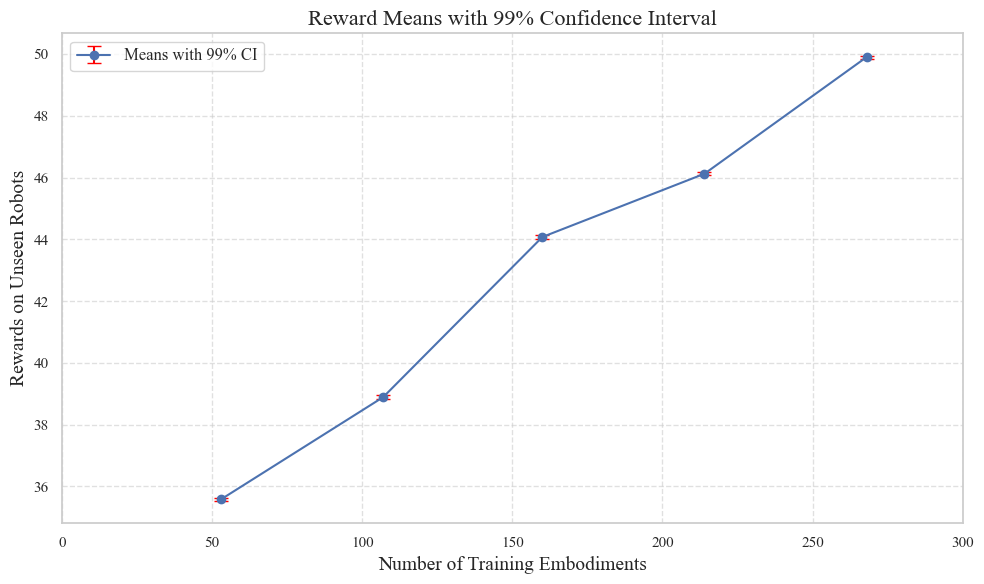

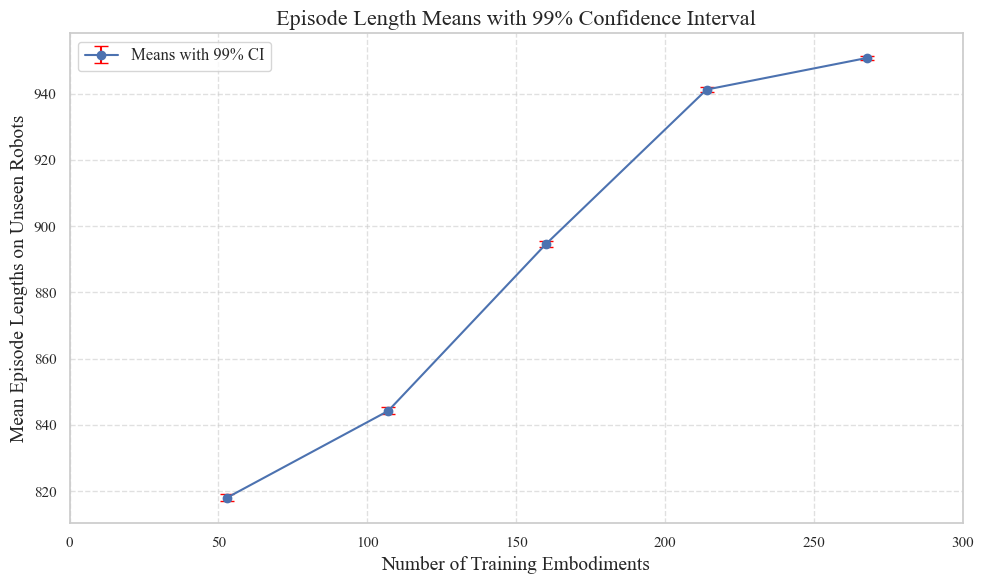

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set Times New Roman globally for the plot
rcParams['font.family'] = 'Times New Roman'

def plot_with_confidence_intervals(data, x_values, title, ylabel, x_labels):
    """
    Plot a line plot with error bars to indicate confidence intervals.

    Parameters:
        data (list of arrays): List of arrays where each array contains values (e.g., repetitions) for one policy.
        x_values (list of float): List of x-values corresponding to the means (e.g., [0.2, 0.6]).
        title (str): Title of the plot.
        ylabel (str): Label for the y-axis.
        x_labels (list of str): Labels for the x-axis ticks.
    """
    # Compute means and 95% confidence intervals for each policy
    means = [np.mean(d) for d in data]
    cis = [2.576 * (np.std(d) / np.sqrt(len(d))) for d in data]  # 99% CI (replace 2.576 with 1.96 for 95% CI)

    # Plot the means with error bars
    plt.figure(figsize=(10, 6))
    plt.errorbar(x_values, means, yerr=cis, fmt='o-', color='b', ecolor='red', capsize=5, label="Means with 99% CI")
    
    # Add labels, title, and legend
    # plt.xticks(x_values, x_labels, fontsize=12)
    plt.xlabel("Number of Training Embodiments", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xlim(0,300)
    plt.title(title, fontsize=16)
    plt.legend(fontsize=12, loc="best")
    plt.grid(visible=True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# # Example usage
# # Simulated example data: rewards for two policies (each with 4096 repetitions)
# policy_1_rewards = np.random.normal(10, 1, 4096)
# policy_2_rewards = np.random.normal(12, 1, 4096)
# reward_data = [policy_1_rewards, policy_2_rewards]

# policy_1_lengths = np.random.normal(100, 5, 4096)
# policy_2_lengths = np.random.normal(105, 5, 4096)
# length_data = [policy_1_lengths, policy_2_lengths]

x_values = [53, 107, 160, 214, 268 ]  # 53, 107, 160, 214, 268 
x_labels = ["20%", "40%", "60%", "80%", "100%"]

# Plot for rewards
plot_with_confidence_intervals(
    data=reward_means_list,
    x_values=x_values,
    title="Reward Means with 99% Confidence Interval",
    ylabel="Rewards on Unseen Robots",
    x_labels=x_labels
)

# Plot for episode lengths
plot_with_confidence_intervals(
    data=length_means_list,
    x_values=x_values,
    title="Episode Length Means with 99% Confidence Interval",
    ylabel="Mean Episode Lengths on Unseen Robots",
    x_labels=x_labels
)


## Visualize expert performance


In [ ]:
import os
import json
from datetime import datetime

# def get_rewards_as_dict(base_path, tasks):
#     """
#     Extract the most recent 'average_return' for each task and return as a single dictionary.
#     """
#     results = {}

#     for task_prefix in tasks:
#         # Find all folders matching the task prefix
#         matching_folders = [
#             f for f in os.listdir(base_path) if f.startswith(task_prefix) and os.path.isdir(os.path.join(base_path, f))
#         ]

#         if not matching_folders:
#             print(f"No matching folders found for task prefix '{task_prefix}'")
#             continue

#         # Find the most recent subfolder
#         most_recent = None
#         for folder in matching_folders:
#             task_path = os.path.join(base_path, folder)
#             subfolders = [
#                 d for d in os.listdir(task_path)
#                 if os.path.isdir(os.path.join(task_path, d)) and d.replace("_", "-").replace("-", "").isdigit()
#             ]
#             print(0, task_path, subfolders)

#             if not subfolders:
#                 continue

#             subfolders.sort(key=lambda d: datetime.strptime(d, "%Y-%m-%d_%H-%M-%S_v1"), reverse=True)
#             recent_subfolder = subfolders[0]
#             recent_path = os.path.join(task_path, recent_subfolder, "h5py_record", "reward_log_file.json")

#             if os.path.exists(recent_path):
#                 most_recent = recent_path
#                 break
                
#         print(2, matching_folders, most_recent)
#         # Retrieve the data for the task
#         if most_recent:
#             try:
#                 with open(most_recent, "r") as f:
#                     data = json.load(f)
#                     # Extract task-specific data and add to results
#                     if task_prefix in data:
#                         results[task_prefix] = {"average_return": data[task_prefix].get("average_return", "N/A")}
#                     else:
#                         print(f"Task '{task_prefix}' not found in JSON file: {most_recent}")
#             except (json.JSONDecodeError, KeyError):
#                 print(f"Error reading JSON data from '{most_recent}'")

#     return results


def get_rewards_as_dict(base_path, tasks):
    """
    Extract the most recent 'average_return' for each task and return as a single dictionary.
    """
    results = {}

    for task_prefix in tasks:
        # Find all folders matching the task prefix exactly before the first underscore
        matching_folders = [
            f for f in os.listdir(base_path)
            if f.startswith(task_prefix + "_") and os.path.isdir(os.path.join(base_path, f))
        ]

        # Ensure there's exactly one matching folder
        if len(matching_folders) == 0:
            print(f"No matching folders found for task prefix '{task_prefix}'")
            continue
        if len(matching_folders) > 1:
            raise ValueError(f"Multiple folders found for task prefix '{task_prefix}': {matching_folders}")

        task_path = os.path.join(base_path, matching_folders[0])

        # Find the most recent subfolder
        subfolders = [
            d for d in os.listdir(task_path)
            if os.path.isdir(os.path.join(task_path, d)) and d.startswith("2025-")
        ]

        if not subfolders:
            print(f"No subfolders found in '{task_path}'")
            continue

        # Sort subfolders by timestamp, assuming format: "2025-01-14_01-05-29_v1"
        subfolders.sort(key=lambda d: datetime.strptime(d.split("_v")[0], "%Y-%m-%d_%H-%M-%S"), reverse=True)
        most_recent_subfolder = subfolders[0]
        recent_path = os.path.join(task_path, most_recent_subfolder, "h5py_record", "reward_log_file.json")

        # Retrieve the data for the task
        if os.path.exists(recent_path):
            try:
                with open(recent_path, "r") as f:
                    data = json.load(f)
                    # Extract task-specific data and add to results
                    if task_prefix in data:
                        results[task_prefix] = {"average_return": data[task_prefix].get("average_return", "N/A")}
                    else:
                        print(f"Task '{task_prefix}' not found in JSON file: {recent_path}")
            except (json.JSONDecodeError, KeyError) as e:
                print(f"Error reading JSON data from '{recent_path}': {e}")
        else:
            print(f"Reward log file not found: {recent_path}")

    return results

# Example usage
# tasks = [
#     "Gendog266", "Gendog252", "Gendog72", "Gendog71", "Gendog207",
#     "Gendog104", "Gendog128", "Gendog272", "Gendog215", "Gendog248",
#     "Gendog229", "Gendog280", "Gendog278", "Gendog32", "Gendog55",
#     "Gendog75", "Gendog0", "Gendog282", "Gendog63", "Gendog47",
#     "Gendog241", "Gendog222", "Gendog286", "Gendog181", "Gendog183",
#     "Gendog97", "Gendog250", "Gendog20", "Gendog7", "Gendog258",
#     "Gendog111", "Gendog41", "Gendog132", "Gendog113", "Gendog31",
#     "Gendog290", "Gendog124", "Gendog46", "Gendog170", "Gendog48",
#     "Gendog204", "Gendog260", "Gendog298", "Gendog226", "Gendog261",
#     "Gendog37", "Gendog144", "Gendog244"
# ]

tasks = [f"Genhexapod{i}" for i in range(0, 336)]

base_path = "/liudai-fast-vol/code/embodiment-scaling-law/logs/rsl_rl/"

expert_reward_results = get_rewards_as_dict(base_path, tasks)

# # Print results
# for task, average_return in expert_reward_results.items():
#     print(f"Task: {task}, Average Return: {average_return}")


In [ ]:
len(expert_reward_results)

In [ ]:
plot_histograms_separately([expert_reward_results])

## Comparative study

In [ ]:
# # Compute expert_mean and expert_std
# expert_values = [v["average_return"] for v in expert_reward_results.values()]
# expert_mean = np.mean(expert_values)
# expert_std = np.std(expert_values)

# Calculate statistics for bar chart
means = [np.mean([v["average_return"] for v in d.values()]) for d in data_dicts]
stds = [np.std([v["average_return"] for v in d.values()]) for d in data_dicts]

# Add expert values to bar chart
x_labels = [f"File {i+1}" for i in range(len(data_dicts))] + ["Expert"]
# means.append(expert_mean)
# stds.append(expert_std)

# Plot bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(x_labels, means, yerr=stds, capsize=5, alpha=0.7, color=['blue'] * len(data_dicts) + ['red'])
plt.ylabel("Mean Average Return")
plt.title("Bar Chart with Error Bars (Including Expert)")
plt.tight_layout()
plt.show()

# # Plot line plot with expert mean and std
# all_means = [np.mean([v["average_return"] for v in d.values()]) for d in data_dicts]
# all_stds = [np.std([v["average_return"] for v in d.values()]) for d in data_dicts]
# labels = [f"File {i+1}" for i in range(len(data_dicts))]

# plt.figure(figsize=(10, 6))
# plt.errorbar(labels, all_means, yerr=all_stds, fmt='-o', capsize=5, color='green', alpha=0.7, label="Files")
# plt.axhline(expert_mean, color='red', linestyle='--', label="Expert Mean")
# plt.axhline(expert_mean + expert_std, color='red', linestyle=':', label="Expert Mean + Std")
# plt.axhline(expert_mean - expert_std, color='red', linestyle=':', label="Expert Mean - Std")
# plt.ylabel("Average Return")
# plt.title("Line Plot Comparing All Files (Including Expert)")
# plt.legend()
# plt.tight_layout()
# plt.show()